In [1]:
import pandas as pd
import lib
import matplotlib.pyplot as plt

In [2]:
geosra_pd = pd.read_parquet('../data/raw/geo-sra-ecological-1604.parquet.gzip')
print(geosra_pd["organism"].head())

123                metagenome
124    chicken gut metagenome
125      mouse gut metagenome
126                metagenome
128      human gut metagenome
Name: organism, dtype: string


In [3]:
# Extract the dictionary
count  = dict(geosra_pd["organism"].value_counts())
print(count)

{'soil metagenome': 857995, 'human gut metagenome': 778884, 'metagenome': 584175, 'gut metagenome': 396320, 'human metagenome': 313629, 'mouse gut metagenome': 238518, 'plant metagenome': 194140, 'marine metagenome': 188390, 'wastewater metagenome': 152366, 'freshwater metagenome': 126464, 'human oral metagenome': 125481, 'rhizosphere metagenome': 102298, 'feces metagenome': 101332, 'human skin metagenome': 79882, 'sediment metagenome': 70596, 'seawater metagenome': 65082, 'pig gut metagenome': 64220, 'root metagenome': 63520, 'tick metagenome': 58696, 'human vaginal metagenome': 54943, 'bovine gut metagenome': 53260, 'aquatic metagenome': 52792, 'chicken gut metagenome': 41390, 'marine sediment metagenome': 38928, 'mouse metagenome': 38651, 'air metagenome': 38350, 'insect metagenome': 37926, 'coral metagenome': 35570, 'phyllosphere metagenome': 35218, 'skin metagenome': 35098, 'human nasopharyngeal metagenome': 34777, 'human lung metagenome': 34746, 'human feces metagenome': 33510, '

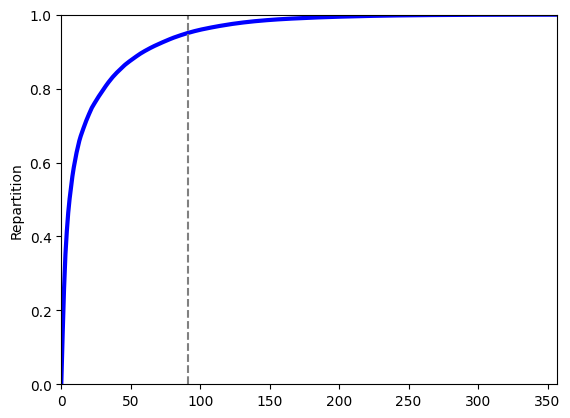

In [4]:
# Repartition function
repa,thr = lib.repartition(count)

c:\Users\thillairet\OneDrive - ENSG Géomatique\Documents\git\viromatlas-wastewater\code\lib.py:109: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  dist_matrix[i, j] = nlp(chains[i]).similarity(nlp(chains[j]))


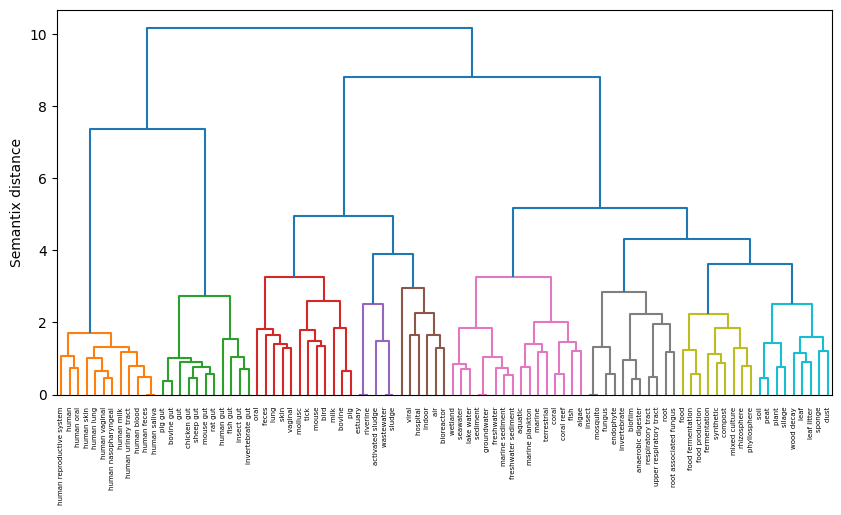

In [15]:
# Dendogram (semantix)
chains = list(count.keys())[:thr]
chains = [chain.replace('metagenome', '') for chain in chains]
dend = lib.semantix_dendogram(chains, ct=3.5)

In [16]:
# Dictionary shelves : cluster
shelves = [dend['ivl'][i]+'metagenome' for i in range(len(dend['ivl']))]
class_dict = dict(zip(shelves,dend['leaves_color_list']))

# List of classes (clusters)
class_list = []
for shelve in shelves:
    classe = class_dict[shelve]
    if classe not in class_list:
        class_list.append(classe)
class_list.append('NC')

# Count of classes (clusters)
class_count = [0]*len(class_list)
for i in range(len(class_list)):
    classe = class_list[i]
    for shelve in shelves:
        if classe == class_dict[shelve]:
            class_count[i] += count[shelve]
class_count[len(class_count)-1] = sum(count.values()) - sum(class_count)

# Dictionary cluster : count
count_dict = dict(zip(class_list,class_count))

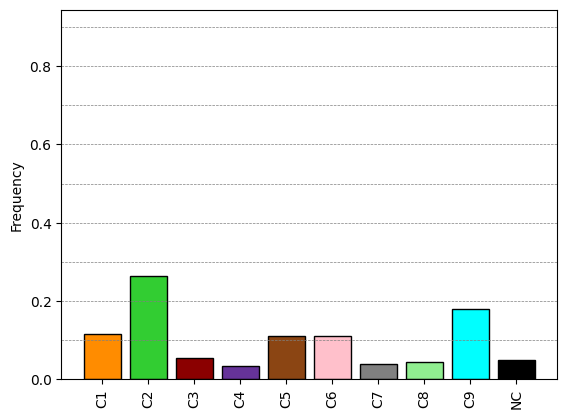

In [17]:
# Histogramm of the clusters
colors = ["darkorange","limegreen","darkred","rebeccapurple","saddlebrown","pink","gray","lightgreen","cyan","black"]
lib.norm_hist(count_dict,colors=colors)

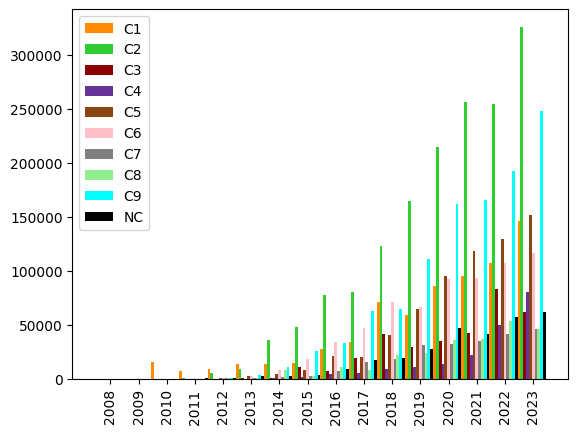

In [18]:
geosra_pd["cluster_class"] = geosra_pd["organism"].map(class_dict)
geosra_pd["cluster_class"] = geosra_pd["cluster_class"].fillna("NC")
geosra_pd["release_year"] = geosra_pd["releasedate"].dt.year
datas = []
for year in range(2008,2024):
    data_year = dict(geosra_pd[geosra_pd["release_year"] == year]["cluster_class"].value_counts())
    for cluster in class_list:
        if not cluster in data_year:
            data_year[cluster] = 0.0 
    data_year = dict(sorted(data_year.items()))
    datas.append(data_year)
df = pd.DataFrame(datas,index=[year for year in range(2008,2024)])
lib.hist(df, width_bar=0.1, colors=colors)

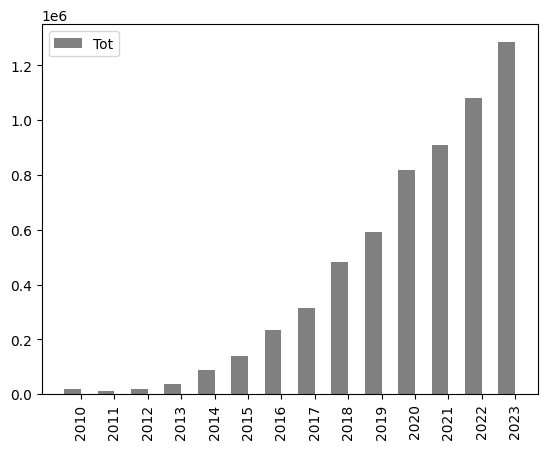

In [25]:
datas = []
for year in range(2010,2024):
    data_year = {"Tot": len(geosra_pd[geosra_pd["release_year"] == year])}
    datas.append(data_year)
df = pd.DataFrame(datas,index=[year for year in range(2010,2024)])
lib.hist(df, width_bar = 0.5, colors=["gray"])

In [19]:
geosra_pd.to_parquet("../data/processed/geosra_clusters.parquet.gzip")